<a href="https://colab.research.google.com/github/S-47/face_mask_detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

**CONNECTING TO MY KAGGLE ACCOUNT**

In [2]:
import os
os.environ['KAGGLE_USERNAME']='username'
os.environ['KAGGLE_KEY']='key'

**DOWNLOADING DATASET**

In [3]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 91% 189M/207M [00:01<00:00, 120MB/s]
100% 207M/207M [00:01<00:00, 121MB/s]


**UNZIP DATASET**

In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

**PUT DIRECTORIES INTO VARIABLES**

In [5]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')


In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1095.jpg', '1584.jpg', '1154.jpg', '0577.jpg', '0273.jpg', '0414.jpg', '1493.jpg', '0311.jpeg', '0862.jpg', '1107.jpg']
['217.jpg', '225.jpg', '293.jpg', '89.jpg', '227.jpg', '124.jpg', '6.jpg', '50.jpg', '187.jpg', '280.jpg']


['/content/New Masks Dataset/Train/Mask/1095.jpg', '/content/New Masks Dataset/Train/Mask/1584.jpg', '/content/New Masks Dataset/Train/Mask/1154.jpg', '/content/New Masks Dataset/Train/Mask/0577.jpg', '/content/New Masks Dataset/Train/Mask/0273.jpg', '/content/New Masks Dataset/Train/Mask/0414.jpg', '/content/New Masks Dataset/Train/Mask/1493.jpg', '/content/New Masks Dataset/Train/Mask/0311.jpeg']
['/content/New Masks Dataset/Train/Non Mask/217.jpg', '/content/New Masks Dataset/Train/Non Mask/225.jpg', '/content/New Masks Dataset/Train/Non Mask/293.jpg', '/content/New Masks Dataset/Train/Non Mask/89.jpg', '/content/New Masks Dataset/Train/Non Mask/227.jpg', '/content/New Masks Dataset/Train/Non Mask/124.jpg', '/content/New Masks Dataset/Train/Non Mask/6.jpg', '/content/New Masks Dataset/Train/Non Mask/50.jpg']


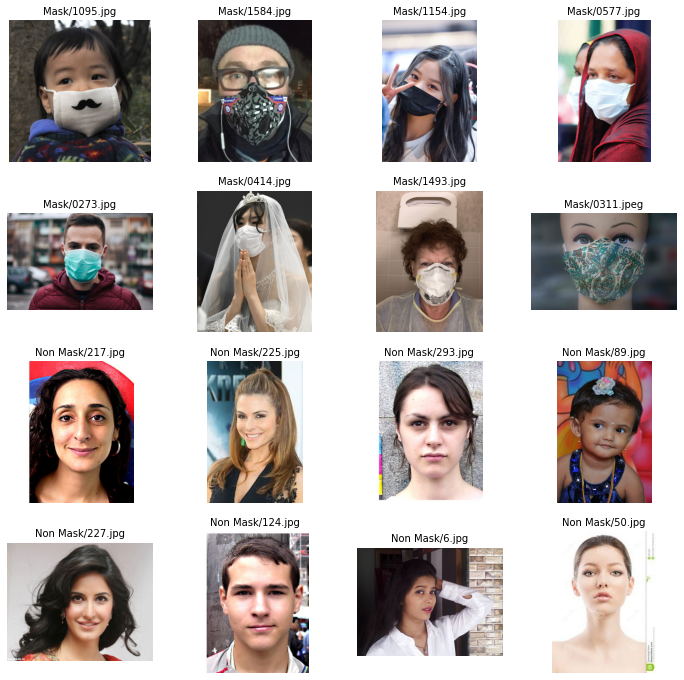

In [7]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()
  


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [10]:
train_generator.image_shape

(150, 150, 3)

**CREATE OUR MODEL**

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [12]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 24s 696ms/step - loss: 3.2535 - accuracy: 0.5083 - val_loss: 0.6930 - val_accuracy: 0.5033
Epoch 2/30
19/19 [==============================] - 13s 697ms/step - loss: 0.6192 - accuracy: 0.6867 - val_loss: 0.6668 - val_accuracy: 0.6993
Epoch 3/30
19/19 [==============================] - 13s 683ms/step - loss: 0.4885 - accuracy: 0.7867 - val_loss: 0.5878 - val_accuracy: 0.7974
Epoch 4/30
19/19 [==============================] - 13s 683ms/step - loss: 0.3582 - accuracy: 0.8483 - val_loss: 0.4830 - val_accuracy: 0.8007
Epoch 5/30
19/19 [==============================] - 13s 696ms/step - loss: 0.3075 - accuracy: 0.8983 - val_loss: 0.3340 - val_accuracy: 0.8529
Epoch 6/30
19/19 [==============================] - 14s 729ms/step - loss: 0.2658 - accuracy: 0.9100 - val_loss: 0.3910 - val_accuracy: 0.8333
Epoch 7/30
19/19 [==============================] - 13s 715ms/step - loss: 0.2731 - accuracy: 0.8900 - val_loss: 0.3454 - val_accuracy: 0.9052

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

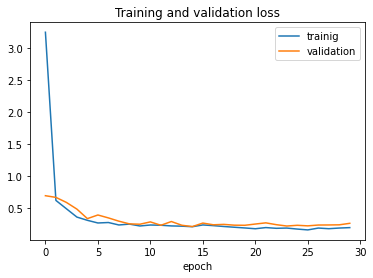

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

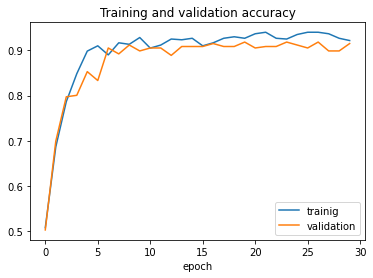

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [17]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 2s 474ms/step - loss: 0.2126 - accuracy: 0.8900
test acc :0.8899999856948853 test loss:0.21259023249149323


USE THE MODEL TO MAKE PREDICTIONS FOR NEW IMAGES 

In [19]:
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = load_img(img_path , target_size=(150,150))
  images = img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving nomask.jpg to nomask (1).jpg
Saving mask.jpg to mask (1).jpg
1/1 [==============================] - 0s 21ms/step
nomask.jpg
nomask
1/1 [==============================] - 0s 20ms/step
mask.jpg
mask
